# EnvErgo project
- [researchgate link](https://www.researchgate.net/project/Isokinetic-measurements-and-musculoskeletal-modelling-for-ergonomics)
- [github link](https://github.com/romainmartinez/envergo)

_Romain Martinez_

# Statistical Parametric Mapping

- To non-parametrically analyze 2D-1D data, for example, just flatten all of the 2D continua into 1D vectors, then use spm1d to run non-parametric analysis to compute a critical threshold. 
- Afterwards you can reshape the 1D test-statistic continuum (or, conventionally, the 1D "statistical parametric map") back into its original 2D form, and then visualize regions of the 2D continuum that survive the critical threshold.
- One caveat is that this pertains only to continuum-level inference (i.e. a critical threshold). For 1D-nD continua spm1d also computes cluster-level and set-level probabilities. spm1d is currently unable compute cluster-level and set-level inferences for mD continua where m > 1.

## Data description
- 3 files for each position:
    1. `participant_position_CVP`: `Couple_ext`, `Couple_flex`, `Position`, `Vitese` (441, 1 each)
    2. `participant_position_Flex_meshdata`: `Angle4mesh` (1, 21), `Velocity4mesh` (1, 21), `torque4mesh`(21, 21)
    3. `participant_position_Ext_meshdata`: `Angle4mesh` (1, 21), `Velocity4mesh` (1, 21), `torque4mesh` (21, 21)
- We will use `Angle4mesh` (1, 21), `Velocity4mesh` (1, 21), `torque4mesh`(21, 21) to generate mesh and do the stats

In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import spm1d

In [27]:
data_path = '/home/romain/Desktop/envergo'
files = os.listdir(data_path)

torque = {}

for ifile in files:
    if ifile.endswith('meshdata.mat'):
        participant, position, contraction, ext = ifile.split('_')

        mat = sio.loadmat(os.path.join(data_path, ifile))['Torque4mesh']
        if not position in torque:
            torque[position] = {}
        if contraction in torque[position]:
            torque[position][contraction] = np.dstack((torque[position][contraction], mat))
        else:
            torque[position][contraction] = mat


torque['Abd90ER']['Flex'].shape

(21, 21, 2)

In [73]:
x = np.arange(1, 22)
y = np.arange(1, 22)
z = np.random.rand(441).reshape(21, 21)

reshape_x = np.tile(x, 21)
reshape_y = np.repeat(y, 21)
reshape_z = z.flatten()



import pandas as pd
xi = pd.DataFrame({
    'velocity': reshape_x,
    'angle': reshape_y,
    'torque': reshape_z
})
xi.head()

,angle,torque,velocity
0,1,0.512957,1
1,1,0.731175,2
2,1,0.101803,3
3,1,0.362116,4
4,1,0.670373,5


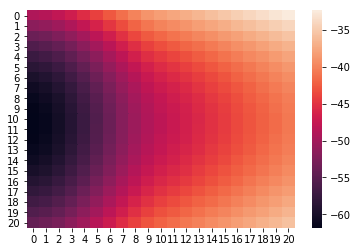

In [35]:
import seaborn as sns
sns.heatmap(torque['Abd90ER']['Flex'][:, :, 1])
plt.show()

In [60]:
y = np.empty([])

for position in torque:
    np.vstack(y, torque[position]['Flex'])

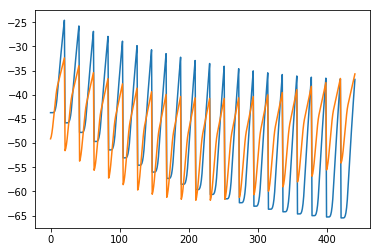

In [43]:
for i in range(2):
    plt.plot(torque['Abd90ER']['Flex'][:, :, i].flatten())
plt.show()